In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,recall_score,confusion_matrix,roc_auc_score,precision_score
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.svm import LinearSVC,SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel


In [2]:
data = pd.read_csv('CE802_P2_Data.csv')
print(data.shape)
data.head(5)

(1500, 16)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,True


In [3]:
test_data = pd.read_csv('CE802_P2_Test.csv')
print(test_data.shape)
test_data.head(5)

(1500, 16)


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.81,NaN
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.10,NaN
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.05,NaN
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,NaN,NaN
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,NaN,NaN


**<h1>Data Preprocessing Phase</h1>**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
F1       1500 non-null float64
F2       1500 non-null float64
F3       1500 non-null int64
F4       1500 non-null float64
F5       1500 non-null int64
F6       1500 non-null float64
F7       1500 non-null float64
F8       1500 non-null float64
F9       1500 non-null float64
F10      1500 non-null float64
F11      1500 non-null float64
F12      1500 non-null float64
F13      1500 non-null float64
F14      1500 non-null float64
F15      750 non-null float64
Class    1500 non-null bool
dtypes: bool(1), float64(13), int64(2)
memory usage: 177.4 KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 16 columns):
F1       1500 non-null float64
F2       1500 non-null float64
F3       1500 non-null int64
F4       1500 non-null float64
F5       1500 non-null int64
F6       1500 non-null float64
F7       1500 non-null float64
F8       1500 non-null float64
F9       1500 non-null float64
F10      1500 non-null float64
F11      1500 non-null float64
F12      1500 non-null float64
F13      1500 non-null float64
F14      1500 non-null float64
F15      750 non-null float64
Class    0 non-null float64
dtypes: float64(14), int64(2)
memory usage: 187.6 KB


In [6]:
data.isnull().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [7]:
test_data.isnull().sum()

F1          0
F2          0
F3          0
F4          0
F5          0
F6          0
F7          0
F8          0
F9          0
F10         0
F11         0
F12         0
F13         0
F14         0
F15       750
Class    1500
dtype: int64

**<h1>Visualizing missing data </h1>**

**<h4>Visualizing missing data using heatmaps in seaborn</h4>**

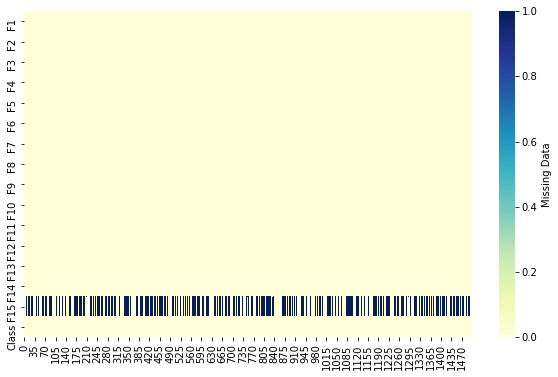

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

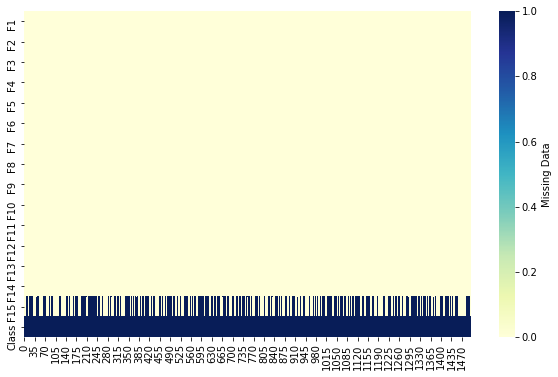

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(test_data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

**<h4>Visualizing missing data using distplot in seaborn</h4>**

<Figure size 720x432 with 0 Axes>

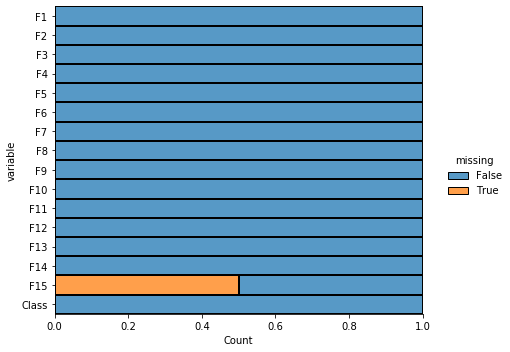

In [10]:
plt.figure(figsize=(10,6))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 720x432 with 0 Axes>

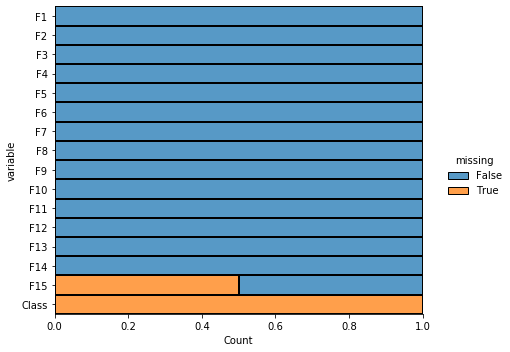

In [11]:
plt.figure(figsize=(10,6))
sns.displot(
    data=test_data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<h4>When we check the null values in the datasets, we can find that 50% of data is missing in one of the feature so, we can neglect those features and create a prediction model without considering those features.</h4>

In [12]:
dropped_data = data.drop('F15',axis=1)
dropped_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,True


In [13]:
dropped_data.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
count,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,9.111160,1.392353,327.07400,-1.389733,10.806667,26.935627,-3.173480,152.305333,4.96876,8.977533,-21.637573,-28.958000,11.562840,-227.382000
std,7.541549,1.108964,352.00374,5.090345,9.009814,6.333818,5.108542,71.416874,4.32521,2.491236,5.081288,7.159315,10.395829,120.565344
min,-4.320000,-0.970000,0.00000,-18.120000,0.000000,19.560000,-12.120000,72.860000,0.00000,4.470000,-39.700000,-46.320000,0.000000,-529.140000
25%,1.890000,0.740000,45.00000,-5.160000,2.000000,21.000000,-8.165000,96.860000,1.24000,6.600000,-25.400000,-36.320000,1.800000,-274.140000
50%,12.060000,1.240000,150.00000,-3.370000,2.000000,21.720000,-1.180000,116.860000,2.07000,9.930000,-23.600000,-25.320000,3.060000,-211.140000
75%,14.940000,1.970000,585.00000,3.520000,20.000000,32.460000,0.620000,212.860000,8.20000,10.812500,-16.680000,-23.320000,21.150000,-172.140000
max,32.100000,5.630000,1170.00000,7.740000,20.000000,39.860000,13.620000,317.860000,15.70000,16.710000,-12.320000,-20.320000,31.050000,115.860000


In [14]:
dropped_data.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
F1,1.000000,0.181686,-0.675264,-0.809473,-0.877293,-0.887500,0.826213,-0.619599,-0.762769,0.818105,-0.807678,0.637027,-0.867305,0.207080,0.058308
F2,0.181686,1.000000,-0.012291,-0.176375,-0.229981,-0.182643,0.167082,-0.204661,-0.276405,0.170702,-0.166323,0.336565,-0.201330,-0.251693,-0.024064
F3,-0.675264,-0.012291,1.000000,0.690864,0.742369,0.755121,-0.679250,0.540342,0.706639,-0.676389,0.682649,-0.600153,0.733312,-0.069969,-0.152249
F4,-0.809473,-0.176375,0.690864,1.000000,0.868528,0.883349,-0.813816,0.614240,0.763419,-0.791322,0.804545,-0.614027,0.863434,-0.205886,-0.057144
F5,-0.877293,-0.229981,0.742369,0.868528,1.000000,0.956640,-0.873724,0.744822,0.888977,-0.865109,0.863027,-0.738079,0.954840,-0.194345,-0.203649
F6,-0.887500,-0.182643,0.755121,0.883349,0.956640,1.000000,-0.884842,0.727545,0.837365,-0.873428,0.873595,-0.681754,0.906307,-0.224060,-0.080522
F7,0.826213,0.167082,-0.679250,-0.813816,-0.873724,-0.884842,1.000000,-0.599455,-0.755101,0.802995,-0.804192,0.630234,-0.861852,0.215099,0.079108
F8,-0.619599,-0.204661,0.540342,0.614240,0.744822,0.727545,-0.599455,1.000000,0.672167,-0.595590,0.611131,-0.599113,0.721849,-0.088436,-0.266599
F9,-0.762769,-0.276405,0.706639,0.763419,0.888977,0.837365,-0.755101,0.672167,1.000000,-0.753287,0.750944,-0.637508,0.834246,-0.194739,-0.191255
F10,0.818105,0.170702,-0.676389,-0.791322,-0.865109,-0.873428,0.802995,-0.595590,-0.753287,1.000000,-0.794590,0.620092,-0.854378,0.192413,0.079035


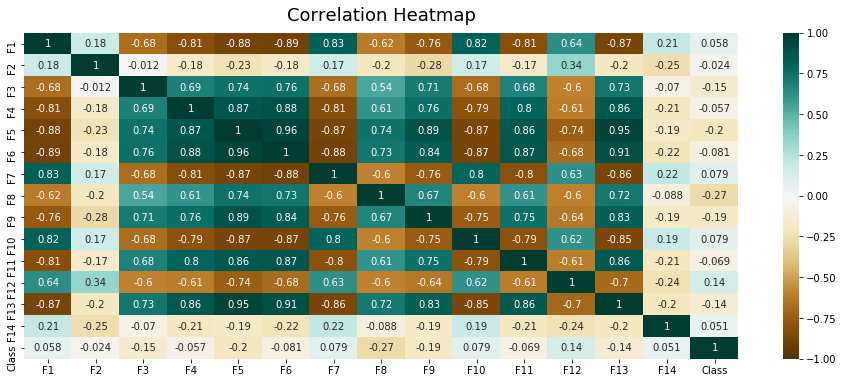

In [15]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(dropped_data.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [16]:
le = LabelEncoder()
dropped_data['Class'] = le.fit_transform(dropped_data['Class'])
dropped_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,1


**<h4>Splitting datasets into train and test splits using decision trees </h4>**

---



In [17]:
X = dropped_data.iloc[:,:-1]
y = dropped_data.iloc[:,-1]
print(len(X))

1500


In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**<h1>Modelling</h1>**

**<h4>Implementing DecisionTree algorithm</h4>**



In [19]:
clf = DecisionTreeClassifier()
#Train the model using the training sets
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [21]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_test, y_pred))

Accuracy: 0.7666666666666667
Precision Score :  0.7666666666666667
Recall Score :  0.7666666666666667
Recall Score :  0.7652879301123195


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.03544
Feature: 1, Score: 0.08220
Feature: 2, Score: 0.05271
Feature: 3, Score: 0.07938
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.18170
Feature: 6, Score: 0.02652
Feature: 7, Score: 0.15899
Feature: 8, Score: 0.08350
Feature: 9, Score: 0.04870
Feature: 10, Score: 0.04504
Feature: 11, Score: 0.01473
Feature: 12, Score: 0.12840
Feature: 13, Score: 0.06267


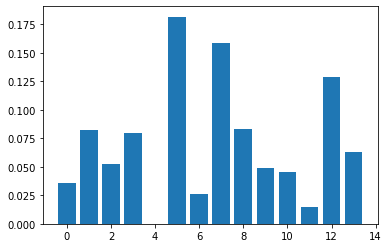

In [22]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation </h4>**

In [23]:
clf = DecisionTreeClassifier()
kfold_validation = KFold(5)

In [24]:
results = cross_val_score(clf,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.77       0.77333333 0.78333333 0.75333333 0.79333333]
0.7746666666666667


**<h4>Implementing Random Forest Algorithm</h4>**

---



In [25]:
clf = RandomForestClassifier()
#Train the model using the training sets
clf.fit(x_train, y_train)


RandomForestClassifier()

In [26]:
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [27]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

print("Precision Score : ",precision_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_test, y_pred))

Accuracy: 0.8566666666666667
Precision Score :  0.8566666666666667
Recall Score :  0.8566666666666667
Recall Score :  0.8575057942592262


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.08465
Feature: 1, Score: 0.07345
Feature: 2, Score: 0.05329
Feature: 3, Score: 0.09391
Feature: 4, Score: 0.00841
Feature: 5, Score: 0.15804
Feature: 6, Score: 0.06357
Feature: 7, Score: 0.09357
Feature: 8, Score: 0.06223
Feature: 9, Score: 0.06886
Feature: 10, Score: 0.06077
Feature: 11, Score: 0.02692
Feature: 12, Score: 0.10365
Feature: 13, Score: 0.04868


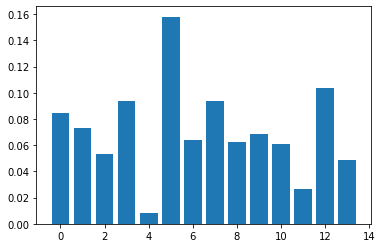

In [28]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation</h4>**

In [29]:
clf = RandomForestClassifier()
kfold_validation = KFold(5)


In [30]:
results = cross_val_score(clf,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.86333333 0.8        0.81       0.86       0.81      ]
0.8286666666666667


<h4>Feature Scaling</h4>

In [31]:
# fit on training data column
scale = StandardScaler().fit(x_train)
    
# transform the training data column
x_train_stand = scale.transform(x_train)

# transform the testing data column
x_test_stand = scale.transform(x_test)

**<h2>Implementing Logistic Regression</h2>**

<h4>Feature Selection Using Lasso Regression</h4>

In [32]:
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver='liblinear'))
sel_.fit(x_train_stand, y_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [33]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False,  True, False,  True,  True])

In [34]:
selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((x_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 10
features with coefficients shrank to zero: 4


In [35]:
np.sum(sel_.estimator_.coef_ == 0)

4

In [36]:
removed_feats = X.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['F7', 'F9', 'F10', 'F12'], dtype='object')

In [37]:
dropped_data_lr = dropped_data.drop(removed_feats.tolist(),axis=1)
dropped_data_lr.head()

,F1,F2,F3,F4,F5,F6,F8,F11,F13,F14,Class
0,16.77,1.25,1080,4.04,20,30.36,112.86,-15.70,26.10,-184.14,0
1,12.45,1.63,156,-6.98,2,21.52,105.86,-25.06,2.55,-208.14,1
2,0.06,1.09,855,6.08,20,33.76,262.86,-14.40,26.25,-394.14,0
3,1.80,2.04,435,1.72,20,31.96,157.86,-17.64,17.25,-64.14,0
4,15.45,1.38,195,-8.70,2,21.10,112.86,-27.50,2.01,-250.14,1


In [38]:
X_lr = dropped_data_lr.iloc[:,:-1]
y_lr = dropped_data_lr.iloc[:,-1]
print(len(X))

1500


In [39]:
x_lr_train,x_lr_test,y_lr_train,y_lr_test = train_test_split(X_lr,y_lr,test_size=0.2,random_state=42)

In [40]:
# fit on training data column
scale = StandardScaler().fit(x_lr_train)
    
# transform the training data column
x_lr_train_stand = scale.transform(x_lr_train)

# transform the testing data column
x_lr_test_stand = scale.transform(x_lr_test)

X_lr_stand = scale.transform(X_lr)


In [41]:
clf = LogisticRegression()
#Train the model using the training sets
clf.fit(x_lr_train_stand, y_lr_train)



LogisticRegression()

In [42]:
#Predict the response for test dataset
y_pred = clf.predict(x_lr_test_stand)



In [43]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_lr_test, y_pred))

print("Precision Score : ",precision_score(y_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_lr_test, y_pred))

Accuracy: 0.7933333333333333
Precision Score :  0.7933333333333333
Recall Score :  0.7933333333333333
Recall Score :  0.7931003743982884


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Cross Validation</h4>**

In [44]:
clf = LogisticRegression()
kfold_validation = KFold(5)

In [45]:
results = cross_val_score(clf,X_lr_stand,y_lr,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.80666667 0.75333333 0.81       0.82       0.78      ]
0.7939999999999999


**<h2>Implementing Support Vector Machine Algorithm</h2>**

**<h4>Feature Selection In SVM</h4>**

In [46]:
sel_ = SelectFromModel(LinearSVC(C=0.1, penalty='l1',dual=False))
sel_.fit(x_train_stand, y_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LinearSVC(C=0.1, dual=False, penalty='l1'))

In [47]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True])

In [48]:
selected_feat = X.columns[(sel_.get_support())]
print('total features: {}'.format((x_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))

total features: 14
selected features: 13
features with coefficients shrank to zero: 1


In [49]:
np.sum(sel_.estimator_.coef_ == 0)

1

In [50]:
removed_feats = X.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['F10'], dtype='object')

In [51]:
dropped_data_svm = dropped_data.drop(removed_feats.tolist(),axis=1)
dropped_data_svm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F11,F12,F13,F14,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,-15.70,-36.32,26.10,-184.14,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,-25.06,-23.32,2.55,-208.14,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,-14.40,-36.32,26.25,-394.14,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,-17.64,-36.32,17.25,-64.14,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,-27.50,-23.32,2.01,-250.14,1


In [52]:
X_svm = dropped_data_svm.iloc[:,:-1]
y_svm = dropped_data_svm.iloc[:,-1]
print(len(X))

1500


In [53]:
x_svm_train,x_svm_test,y_svm_train,y_svm_test = train_test_split(X_svm,y_svm,test_size=0.2,random_state=42)

In [54]:
# fit on training data column
scale = StandardScaler().fit(x_svm_train)
    
# transform the training data column
x_svm_train_stand = scale.transform(x_svm_train)

# transform the testing data column
x_svm_test_stand = scale.transform(x_svm_test)

X_svm_stand = scale.transform(X_svm)


In [55]:
clf = SVC(kernel='linear')
#Train the model using the training sets
clf.fit(x_svm_train_stand, y_svm_train)

SVC(kernel='linear')

In [56]:
#Predict the response for test dataset
y_pred = clf.predict(x_svm_test_stand)


In [57]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_svm_test, y_pred))

print("Precision Score : ",precision_score(y_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_svm_test, y_pred))

Accuracy: 0.7933333333333333
Precision Score :  0.7933333333333333
Recall Score :  0.7933333333333333
Recall Score :  0.7952397931895169


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Cross Validation </h4>**

In [58]:
clf = SVC(kernel='linear')
kfold_validation = KFold(5)

In [59]:
results = cross_val_score(clf,X_svm_stand,y_svm,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.81333333 0.77666667 0.8        0.83333333 0.78666667]
0.8019999999999999


**<h2>Inputting missing values in column 'F15' with mean of the overall data</h2>**


In [60]:
data_with_overall_mean = data.copy()
data_with_overall_mean.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,True


In [61]:
data_with_overall_mean.loc[data_with_overall_mean['F15'].isnull()==True,"F15"] = data_with_overall_mean['F15'].mean()
data_with_overall_mean.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.743013,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.743013,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.670000,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.743013,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.743013,True


In [62]:
le = LabelEncoder()
data_with_overall_mean['Class'] = le.fit_transform(data_with_overall_mean['Class'])
data_with_overall_mean.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.743013,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.743013,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.670000,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.743013,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.743013,1


In [63]:
X_mean = data_with_overall_mean.iloc[:,:-1]
y_mean = data_with_overall_mean.iloc[:,-1]

In [64]:
x_mean_train,x_mean_test,y_mean_train,y_mean_test = train_test_split(X_mean,y_mean,test_size=0.2,random_state=42)


**<h2>Implementing Decision Tree Algorithm after Imputting with mean of the overall data</h2>**

In [65]:
# clf = RandomForestClassifier()
clf = DecisionTreeClassifier()
#Train the model using the training sets
clf.fit(x_mean_train, y_mean_train)

DecisionTreeClassifier()

In [66]:
#Predict the response for test dataset
y_pred = clf.predict(x_mean_test)

In [67]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_mean_test, y_pred))

print("Precision Score : ",precision_score(y_mean_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_mean_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_mean_test, y_pred))

Accuracy: 0.8033333333333333
Precision Score :  0.8033333333333333
Recall Score :  0.8033333333333333
Recall Score :  0.8025940452843643


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.04144
Feature: 1, Score: 0.07061
Feature: 2, Score: 0.07034
Feature: 3, Score: 0.05054
Feature: 4, Score: 0.00351
Feature: 5, Score: 0.13824
Feature: 6, Score: 0.02332
Feature: 7, Score: 0.08716
Feature: 8, Score: 0.03689
Feature: 9, Score: 0.03611
Feature: 10, Score: 0.03998
Feature: 11, Score: 0.00672
Feature: 12, Score: 0.07797
Feature: 13, Score: 0.03266
Feature: 14, Score: 0.28452


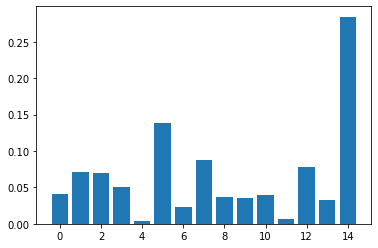

In [68]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation</h4>**

In [69]:
# clf = RandomForestClassifier()
clf = DecisionTreeClassifier()
kfold_validation = KFold(5)

In [70]:
results = cross_val_score(clf,X_mean,y_mean,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.78       0.74333333 0.76666667 0.79666667 0.81      ]
0.7793333333333334



**<h2>Implementing Random Forest Algorithm after Imputting with mean of the overall data</h2>**

In [71]:
clf = RandomForestClassifier()
#Train the model using the training sets
clf.fit(x_mean_train, y_mean_train)

RandomForestClassifier()

In [72]:
#Predict the response for test dataset
y_pred = clf.predict(x_mean_test)

In [73]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_mean_test, y_pred))

print("Precision Score : ",precision_score(y_mean_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_mean_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_mean_test, y_pred))

Accuracy: 0.8866666666666667
Precision Score :  0.8866666666666667
Recall Score :  0.8866666666666667
Recall Score :  0.8881262257086826


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.06578
Feature: 1, Score: 0.06320
Feature: 2, Score: 0.04140
Feature: 3, Score: 0.08466
Feature: 4, Score: 0.01639
Feature: 5, Score: 0.12890
Feature: 6, Score: 0.05182
Feature: 7, Score: 0.07479
Feature: 8, Score: 0.04841
Feature: 9, Score: 0.05538
Feature: 10, Score: 0.05985
Feature: 11, Score: 0.01907
Feature: 12, Score: 0.08608
Feature: 13, Score: 0.03903
Feature: 14, Score: 0.16525


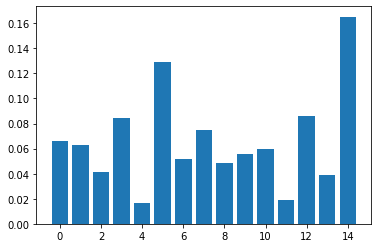

In [74]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h2>K-Fold Cross Validation</h2>**

In [75]:
clf = RandomForestClassifier()
kfold_validation = KFold(5)

In [76]:
results = cross_val_score(clf,X_mean,y_mean,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.88333333 0.83666667 0.87       0.9        0.86      ]
0.8699999999999999


**<h4>Feature Scaling using standardization</h4>**





In [77]:
# fit on training data column
scale = StandardScaler().fit(x_mean_train)
    
# transform the training data column
x_mean_train_stand = scale.transform(x_mean_train)

# transform the testing data column
x_mean_test_stand = scale.transform(x_mean_test)





**<h2>Implementing Logistic Regression Algorithm after Imputting with mean of the overall data</h2>**



**<h4>Feature Selection Using Lasso Regression In Logistic Regression Algorithm</h4>**

In [78]:
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver='liblinear'))
sel_.fit(x_mean_train_stand, y_mean_train)




SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [79]:
sel_.get_support()




array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True])

In [80]:
selected_feat = X_mean.columns[(sel_.get_support())]
print('total features: {}'.format((x_mean_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))



total features: 15
selected features: 12
features with coefficients shrank to zero: 3


In [81]:
np.sum(sel_.estimator_.coef_ == 0)




3

In [82]:
removed_feats = X_mean.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['F7', 'F9', 'F12'], dtype='object')

In [83]:
dropped_data_with_overall_mean_lr = data_with_overall_mean.drop(removed_feats.tolist(),axis=1)
dropped_data_with_overall_mean_lr.head()

,F1,F2,F3,F4,F5,F6,F8,F10,F11,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,112.86,7.74,-15.70,26.10,-184.14,-7.743013,0
1,12.45,1.63,156,-6.98,2,21.52,105.86,10.11,-25.06,2.55,-208.14,-7.743013,1
2,0.06,1.09,855,6.08,20,33.76,262.86,6.01,-14.40,26.25,-394.14,-6.670000,0
3,1.80,2.04,435,1.72,20,31.96,157.86,6.15,-17.64,17.25,-64.14,-7.743013,0
4,15.45,1.38,195,-8.70,2,21.10,112.86,10.26,-27.50,2.01,-250.14,-7.743013,1


In [84]:
X_mean_lr = dropped_data_with_overall_mean_lr.iloc[:,:-1]
y_mean_lr = dropped_data_with_overall_mean_lr.iloc[:,-1]
print(len(X))




1500


In [85]:
x_mean_lr_train,x_mean_lr_test,y_mean_lr_train,y_mean_lr_test = train_test_split(X_mean_lr,y_mean_lr,test_size=0.2,random_state=42)




In [86]:
# fit on training data column
scale = StandardScaler().fit(x_mean_lr_train)
    
# transform the training data column
x_mean_lr_train_stand = scale.transform(x_mean_lr_train)

# transform the testing data column
x_mean_lr_test_stand = scale.transform(x_mean_lr_test)

X_mean_lr_stand = scale.transform(X_mean_lr)





In [87]:
clf = LogisticRegression()
#Train the model using the training sets
clf.fit(x_mean_lr_train_stand, y_mean_lr_train)





LogisticRegression()

In [88]:
#Predict the response for test dataset
y_pred = clf.predict(x_mean_lr_test_stand)





In [89]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_mean_lr_test, y_pred))

print("Precision Score : ",precision_score(y_mean_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_mean_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_mean_lr_test, y_pred))





Accuracy: 0.86
Precision Score :  0.86
Recall Score :  0.86
Recall Score :  0.8592440720270993


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Cross Validation</h4>**

In [90]:
clf = LogisticRegression()
kfold_validation = KFold(5)


In [91]:
results = cross_val_score(clf,X_mean_lr_stand,y_mean_lr,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.89666667 0.83       0.82333333 0.85666667 0.80666667]
0.8426666666666666


**<h2>Implementing Support Vector Machine Algorithm after Imputting with mean of the overall data</h2>**

**<h4>Feature Selection Using Lasso Regression In Support Vector Machine Algorithm</h4>**

In [92]:
sel_ = SelectFromModel(LinearSVC(C=0.1, penalty='l1',dual=False))
sel_.fit(x_mean_train_stand, y_mean_train)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LinearSVC(C=0.1, dual=False, penalty='l1'))

In [93]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [94]:
selected_feat = X_mean.columns[(sel_.get_support())]
print('total features: {}'.format((x_mean_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))


total features: 15
selected features: 15
features with coefficients shrank to zero: 0


In [95]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [96]:
removed_feats = X_mean.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

In [97]:
dropped_data_with_overall_mean_svm = data_with_overall_mean.drop(removed_feats.tolist(),axis=1)
dropped_data_with_overall_mean_svm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.743013,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.743013,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.670000,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.743013,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.743013,1


In [98]:
X_mean_svm = dropped_data_with_overall_mean_svm.iloc[:,:-1]
y_mean_svm = dropped_data_with_overall_mean_svm.iloc[:,-1]
print(len(X_mean_svm))

1500


In [99]:
x_mean_svm_train,x_mean_svm_test,y_mean_svm_train,y_mean_svm_test = train_test_split(X_mean_svm,y_mean_svm,test_size=0.2,random_state=42)

In [100]:
# fit on training data column
scale = StandardScaler().fit(x_mean_svm_train)
    
# transform the training data column
x_mean_svm_train_stand = scale.transform(x_mean_svm_train)

# transform the testing data column
x_mean_svm_test_stand = scale.transform(x_mean_svm_test)

X_mean_svm_stand = scale.transform(X_mean_svm)




In [101]:
clf = SVC(kernel='linear')
#Train the model using the training sets
clf.fit(x_mean_svm_train_stand, y_mean_svm_train)


SVC(kernel='linear')

In [102]:
#Predict the response for test dataset
y_pred = clf.predict(x_mean_svm_test_stand)

In [103]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_mean_svm_test, y_pred))

print("Precision Score : ",precision_score(y_mean_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_mean_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_mean_svm_test, y_pred))





Accuracy: 0.8766666666666667
Precision Score :  0.8766666666666667
Recall Score :  0.8766666666666667
Recall Score :  0.8764931360313781


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Cross Validation</h4>**

In [104]:
clf = SVC(kernel='linear')
kfold_validation = KFold(5)




In [105]:
results = cross_val_score(clf,X_mean_svm_stand,y_mean_svm,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.89666667 0.83666667 0.83       0.87333333 0.84      ]
0.8553333333333333


**<h2>Inputting missing values in column 'F15' with median of the overall data</h2>**

In [106]:
data_with_overall_median = data.copy()
data_with_overall_median.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,True


In [107]:
data_with_overall_median.loc[data_with_overall_median['F15'].isnull()==True,"F15"] = data_with_overall_median['F15'].median()
data_with_overall_median.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.75,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.75,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.75,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.75,True


In [108]:
le = LabelEncoder()
data_with_overall_median['Class'] = le.fit_transform(data_with_overall_median['Class'])
data_with_overall_median.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.75,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.75,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.75,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.75,1


In [109]:
X_median = data_with_overall_median.iloc[:,:-1]
y_median = data_with_overall_median.iloc[:,-1]

In [110]:
x_median_train,x_median_test,y_median_train,y_median_test = train_test_split(X_median,y_median,test_size=0.2,random_state=42)


**<h2>Implementing Decision Tree Algorithm after Imputting with median of the overall data</h2>**

In [111]:
clf = DecisionTreeClassifier()
#Train the model using the training sets
clf.fit(x_median_train, y_median_train)

DecisionTreeClassifier()

In [112]:
#Predict the response for test dataset
y_pred = clf.predict(x_median_test)

In [113]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_median_test, y_pred))

print("Precision Score : ",precision_score(y_median_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_median_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_median_test, y_pred))

Accuracy: 0.8133333333333334
Precision Score :  0.8133333333333334
Recall Score :  0.8133333333333334
Recall Score :  0.8138705651631307


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.03515
Feature: 1, Score: 0.06971
Feature: 2, Score: 0.07917
Feature: 3, Score: 0.04658
Feature: 4, Score: 0.00351
Feature: 5, Score: 0.13868
Feature: 6, Score: 0.03499
Feature: 7, Score: 0.07804
Feature: 8, Score: 0.04111
Feature: 9, Score: 0.02603
Feature: 10, Score: 0.03570
Feature: 11, Score: 0.00735
Feature: 12, Score: 0.07491
Feature: 13, Score: 0.03951
Feature: 14, Score: 0.28956


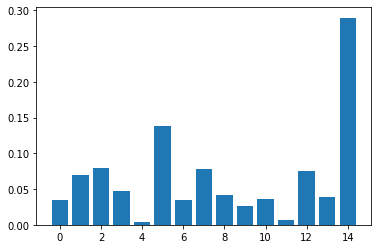

In [114]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation</h4>**

In [115]:
clf = DecisionTreeClassifier()
kfold_validation = KFold(5)

In [116]:
results = cross_val_score(clf,X_median,y_median,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.76       0.76666667 0.76666667 0.77666667 0.81333333]
0.7766666666666667



**<h2>Implementing Random Forest Algorithm after Imputting with median of the overall data</h2>**

In [117]:
clf = RandomForestClassifier()
#Train the model using the training sets
clf.fit(x_median_train, y_median_train)

RandomForestClassifier()

In [118]:
#Predict the response for test dataset
y_pred = clf.predict(x_median_test)

In [119]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_median_test, y_pred))

print("Precision Score : ",precision_score(y_median_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_median_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_median_test, y_pred))

Accuracy: 0.9066666666666666
Precision Score :  0.9066666666666666
Recall Score :  0.9066666666666666
Recall Score :  0.9071135674808344


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.06044
Feature: 1, Score: 0.06268
Feature: 2, Score: 0.04308
Feature: 3, Score: 0.07495
Feature: 4, Score: 0.00996
Feature: 5, Score: 0.13577
Feature: 6, Score: 0.05277
Feature: 7, Score: 0.07635
Feature: 8, Score: 0.05232
Feature: 9, Score: 0.05805
Feature: 10, Score: 0.05992
Feature: 11, Score: 0.01966
Feature: 12, Score: 0.08797
Feature: 13, Score: 0.03890
Feature: 14, Score: 0.16717


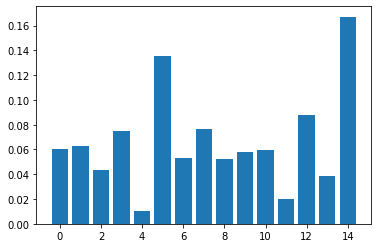

In [120]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation</h4>**

In [121]:
clf = RandomForestClassifier()
kfold_validation = KFold(5)

In [122]:
results = cross_val_score(clf,X_median,y_median,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.90666667 0.83       0.83333333 0.89666667 0.87333333]
0.868


**<h4>Feature Scaling Using Standardization</h4>**

In [123]:
# fit on training data column
scale = StandardScaler().fit(x_median_train)
    
# transform the training data column
x_median_train_stand = scale.transform(x_median_train)

# transform the testing data column
x_median_test_stand = scale.transform(x_median_test)






**<h2>Implementing Logistic Regression Algorithm after Imputting with median of the overall data</h2>**

**<h4>Feature Selection Using Lasso Regression In Logistic Regression Algorithm</h4>**

In [124]:
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver='liblinear'))
sel_.fit(x_median_train_stand, y_median_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [125]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True])

In [126]:
selected_feat = X_median.columns[(sel_.get_support())]
print('total features: {}'.format((x_median_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))


total features: 15
selected features: 12
features with coefficients shrank to zero: 3


In [127]:
np.sum(sel_.estimator_.coef_ == 0)

3

In [128]:
removed_feats = X_median.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['F7', 'F9', 'F12'], dtype='object')

In [129]:
dropped_data_with_overall_median_lr = data_with_overall_median.drop(removed_feats.tolist(),axis=1)
dropped_data_with_overall_median_lr.head()

,F1,F2,F3,F4,F5,F6,F8,F10,F11,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,112.86,7.74,-15.70,26.10,-184.14,-7.75,0
1,12.45,1.63,156,-6.98,2,21.52,105.86,10.11,-25.06,2.55,-208.14,-7.75,1
2,0.06,1.09,855,6.08,20,33.76,262.86,6.01,-14.40,26.25,-394.14,-6.67,0
3,1.80,2.04,435,1.72,20,31.96,157.86,6.15,-17.64,17.25,-64.14,-7.75,0
4,15.45,1.38,195,-8.70,2,21.10,112.86,10.26,-27.50,2.01,-250.14,-7.75,1


In [130]:
X_median_lr = dropped_data_with_overall_median_lr.iloc[:,:-1]
y_median_lr = dropped_data_with_overall_median_lr.iloc[:,-1]


In [131]:
x_median_lr_train,x_median_lr_test,y_median_lr_train,y_median_lr_test = train_test_split(X_median_lr,y_median_lr,test_size=0.2,random_state=42)


In [132]:
# fit on training data column
scale = StandardScaler().fit(x_median_lr_train)
    
# transform the training data column
x_median_lr_train_stand = scale.transform(x_median_lr_train)

# transform the testing data column
x_median_lr_test_stand = scale.transform(x_median_lr_test)

X_median_lr_stand = scale.transform(X_median_lr)


In [133]:
clf = LogisticRegression()
#Train the model using the training sets
clf.fit(x_median_lr_train_stand, y_median_lr_train)



LogisticRegression()

In [134]:
#Predict the response for test dataset
y_pred = clf.predict(x_median_lr_test_stand)


In [135]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_median_lr_test, y_pred))

print("Precision Score : ",precision_score(y_median_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_median_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_median_lr_test, y_pred))

Accuracy: 0.8633333333333333
Precision Score :  0.8633333333333333
Recall Score :  0.8633333333333333
Recall Score :  0.8627651987876627


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Validation In Logistic Regression</h4>**

In [136]:
clf = LogisticRegression()
kfold_validation = KFold(5)

In [137]:
results = cross_val_score(clf,X_median_lr_stand,y_median_lr,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.89666667 0.83       0.82333333 0.85666667 0.81      ]
0.8433333333333334


**<h2>Implementing Support Vector Machine Algorithm after Imputting with median of the overall data</h2>**

**<h4>Feature Selection Using Lasso Regression In Support Vector Machine Algorithm</h4>**

In [138]:
sel_ = SelectFromModel(LinearSVC(C=0.1, penalty='l1',dual=False))
sel_.fit(x_median_train_stand, y_median_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LinearSVC(C=0.1, dual=False, penalty='l1'))

In [139]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [140]:
selected_feat = X_median.columns[(sel_.get_support())]
print('total features: {}'.format((x_median_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))



total features: 15
selected features: 15
features with coefficients shrank to zero: 0


In [141]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [142]:
removed_feats = X_median.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

In [143]:
dropped_data_with_overall_median_svm = data_with_overall_median.drop(removed_feats.tolist(),axis=1)
dropped_data_with_overall_median_svm.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.75,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.75,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.75,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.75,1


In [144]:
X_median_svm = dropped_data_with_overall_median_svm.iloc[:,:-1]
y_median_svm = dropped_data_with_overall_median_svm.iloc[:,-1]

In [145]:
x_median_svm_train,x_median_svm_test,y_median_svm_train,y_median_svm_test = train_test_split(X_median_svm,y_median_svm,test_size=0.2,random_state=42)

In [146]:
# fit on training data column
scale = StandardScaler().fit(x_median_svm_train)
    
# transform the training data column
x_median_svm_train_stand = scale.transform(x_median_svm_train)

# transform the testing data column
x_median_svm_test_stand = scale.transform(x_median_svm_test)

X_median_svm_stand = scale.transform(X_median_svm)


In [147]:
clf = SVC(kernel='linear')
#Train the model using the training sets
clf.fit(x_median_svm_train_stand, y_median_svm_train)


SVC(kernel='linear')

In [148]:
#Predict the response for test dataset
y_pred = clf.predict(x_median_svm_test_stand)


In [149]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_median_svm_test, y_pred))

print("Precision Score : ",precision_score(y_median_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_median_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_median_svm_test, y_pred))


Accuracy: 0.8766666666666667
Precision Score :  0.8766666666666667
Recall Score :  0.8766666666666667
Recall Score :  0.8764931360313781


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Validation</h4>**

In [150]:
clf = SVC(kernel='linear')
kfold_validation = KFold(5)

In [151]:

results = cross_val_score(clf,X_median_svm_stand,y_median_svm,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.89666667 0.83666667 0.83333333 0.87       0.83666667]
0.8546666666666667


**<h2>Imputting missing values using knn algorithm</h2>**

In [152]:
data_with_knn_imputter = data.copy()
data_with_knn_imputter.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,True


In [153]:
le = LabelEncoder()
data_with_knn_imputter['Class'] = le.fit_transform(data_with_knn_imputter['Class'])
data_with_knn_imputter.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,1


In [154]:
from sklearn.impute import KNNImputer
imputter = KNNImputer(n_neighbors=30)
filled_values = imputter.fit_transform(data_with_knn_imputter)

In [155]:
columns = data.columns.tolist()
data_with_knn_filled = pd.DataFrame(data=filled_values,columns=columns)
data_with_knn_filled.head() 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080.0,4.04,20.0,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.632333,0.0
1,12.45,1.63,156.0,-6.98,2.0,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-8.087333,1.0
2,0.06,1.09,855.0,6.08,20.0,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.670000,0.0
3,1.80,2.04,435.0,1.72,20.0,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.486000,0.0
4,15.45,1.38,195.0,-8.70,2.0,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.991000,1.0


In [156]:
X_knn = data_with_knn_filled.iloc[:,:-1]
y_knn = data_with_knn_filled.iloc[:,-1]

In [157]:
x_knn_train,x_knn_test,y_knn_train,y_knn_test = train_test_split(X_knn,y_knn,test_size=0.2,random_state=42)


**<h2>Implementing Decision Tree Algorithm after Imputting the missing values using KNN algorithm</h2>**

In [158]:
clf = DecisionTreeClassifier()
#Train the model using the training sets
clf.fit(x_knn_train,y_knn_train)

DecisionTreeClassifier()

In [159]:
#Predict the response for test dataset
y_pred = clf.predict(x_knn_test)

In [160]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_knn_test,y_pred))

print("Precision Score : ",precision_score(y_knn_test,y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_knn_test,y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_knn_test,y_pred))

Accuracy: 0.8066666666666666
Precision Score :  0.8066666666666666
Recall Score :  0.8066666666666666
Recall Score :  0.8061151720449278


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.03954
Feature: 1, Score: 0.06757
Feature: 2, Score: 0.04820
Feature: 3, Score: 0.05204
Feature: 4, Score: 0.00294
Feature: 5, Score: 0.15422
Feature: 6, Score: 0.01653
Feature: 7, Score: 0.06640
Feature: 8, Score: 0.04532
Feature: 9, Score: 0.03521
Feature: 10, Score: 0.02988
Feature: 11, Score: 0.00186
Feature: 12, Score: 0.08580
Feature: 13, Score: 0.02928
Feature: 14, Score: 0.32521


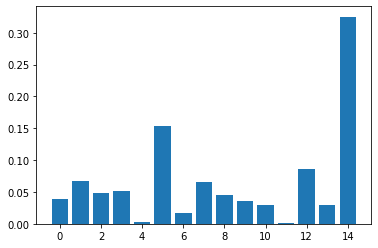

In [161]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation</h4>**

In [162]:
clf = DecisionTreeClassifier()
kfold_validation = KFold(5)

In [163]:
results = cross_val_score(clf,X_knn,y_knn,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.79333333 0.77666667 0.79       0.80666667 0.77      ]
0.7873333333333333



**<h2>Implementing Random Forest Algorithm after Imputting the missing values using KNN algorithm</h2>**

In [164]:
clf = RandomForestClassifier()
#Train the model using the training sets
clf.fit(x_knn_train,y_knn_train)

RandomForestClassifier()

In [165]:
#Predict the response for test dataset
y_pred = clf.predict(x_knn_test)

In [166]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_knn_test, y_pred))

print("Precision Score : ",precision_score(y_knn_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_knn_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_knn_test, y_pred))

Accuracy: 0.89
Precision Score :  0.89
Recall Score :  0.89
Recall Score :  0.8898645034765555


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Feature: 0, Score: 0.06218
Feature: 1, Score: 0.05762
Feature: 2, Score: 0.03992
Feature: 3, Score: 0.07034
Feature: 4, Score: 0.01135
Feature: 5, Score: 0.13646
Feature: 6, Score: 0.05107
Feature: 7, Score: 0.06578
Feature: 8, Score: 0.04624
Feature: 9, Score: 0.05116
Feature: 10, Score: 0.05294
Feature: 11, Score: 0.01873
Feature: 12, Score: 0.07416
Feature: 13, Score: 0.03582
Feature: 14, Score: 0.22624


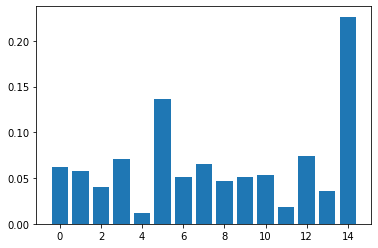

In [167]:
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**<h4>K-Fold Cross Validation</h4>**

In [168]:
clf = RandomForestClassifier()
kfold_validation = KFold(5)

In [169]:
results = cross_val_score(clf,X_knn,y_knn,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.89       0.84       0.84       0.9        0.86333333]
0.8666666666666666


**<h4>Feature Scaling Using Standardization </h4>**

In [170]:
# fit on training data column
scale = StandardScaler().fit(x_knn_train)
    
# transform the training data column
x_knn_train_stand = scale.transform(x_knn_train)

# transform the testing data column
x_knn_test_stand = scale.transform(x_knn_test)





**<h2>Implementing Logistic Regression Algorithm after Imputting missing values with KNN</h2>**

**<h4>Feature Selection Using Lasso Regression In Logistic Regression Algorithm</h4>**

In [171]:
sel_ = SelectFromModel(LogisticRegression(C=0.1, penalty='l1',solver='liblinear'))
sel_.fit(x_knn_train_stand,y_knn_train)





SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [172]:
sel_.get_support()





array([ True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True, False,  True,  True,  True])

In [173]:
selected_feat = X_knn.columns[(sel_.get_support())]
print('total features: {}'.format((x_knn_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))






total features: 15
selected features: 12
features with coefficients shrank to zero: 3


In [174]:
np.sum(sel_.estimator_.coef_ == 0)

3

In [175]:
removed_feats = X_knn.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['F7', 'F9', 'F12'], dtype='object')

In [176]:
dropped_data_with_knn_filled_lr = data_with_knn_filled.drop(removed_feats.tolist(),axis=1)
dropped_data_with_knn_filled_lr.head()

,F1,F2,F3,F4,F5,F6,F8,F10,F11,F13,F14,F15,Class
0,16.77,1.25,1080.0,4.04,20.0,30.36,112.86,7.74,-15.70,26.10,-184.14,-7.632333,0.0
1,12.45,1.63,156.0,-6.98,2.0,21.52,105.86,10.11,-25.06,2.55,-208.14,-8.087333,1.0
2,0.06,1.09,855.0,6.08,20.0,33.76,262.86,6.01,-14.40,26.25,-394.14,-6.670000,0.0
3,1.80,2.04,435.0,1.72,20.0,31.96,157.86,6.15,-17.64,17.25,-64.14,-7.486000,0.0
4,15.45,1.38,195.0,-8.70,2.0,21.10,112.86,10.26,-27.50,2.01,-250.14,-7.991000,1.0


In [177]:
X_knn_lr = dropped_data_with_knn_filled_lr.iloc[:,:-1]
y_knn_lr = dropped_data_with_knn_filled_lr.iloc[:,-1]

In [178]:
x_knn_lr_train,x_knn_lr_test,y_knn_lr_train,y_knn_lr_test = train_test_split(X_knn_lr,y_knn_lr,test_size=0.2,random_state=42)

In [179]:
# fit on training data column
scale = StandardScaler().fit(x_knn_lr_train)
    
# transform the training data column
x_knn_lr_train_stand = scale.transform(x_knn_lr_train)

# transform the testing data column
x_knn_lr_test_stand = scale.transform(x_knn_lr_test)

X_knn_lr_stand = scale.transform(X_knn_lr)



In [180]:
clf = LogisticRegression()
#Train the model using the training sets
clf.fit(x_knn_lr_train_stand, y_knn_lr_train)


LogisticRegression()

In [181]:
#Predict the response for test dataset
y_pred = clf.predict(x_knn_lr_test_stand)


In [182]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_knn_lr_test, y_pred))

print("Precision Score : ",precision_score(y_knn_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_knn_lr_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_knn_lr_test, y_pred))


Accuracy: 0.87
Precision Score :  0.87
Recall Score :  0.87
Recall Score :  0.8701640221073275


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Validation</h4>**

In [183]:
clf = LogisticRegression()
kfold_validation = KFold(5)

In [184]:
results = cross_val_score(clf,X_knn_lr_stand,y_knn_lr,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.86333333 0.80333333 0.81333333 0.84333333 0.80666667]
0.826






**<h2>Implementing Logistic Regression Algorithm after Imputting missing values with KNN</h2>**

**<h4>Feature Selection Using Lasso Regression In Support Vector Machine ALgorithm Algorithm</h4>**

In [185]:
sel_ = SelectFromModel(LinearSVC(C=0.1, penalty='l1',dual=False))
sel_.fit(x_knn_train_stand,y_knn_train)


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


SelectFromModel(estimator=LinearSVC(C=0.1, dual=False, penalty='l1'))

In [186]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [187]:
selected_feat = X_knn.columns[(sel_.get_support())]
print('total features: {}'.format((x_knn_train_stand.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))



total features: 15
selected features: 15
features with coefficients shrank to zero: 0


In [188]:
np.sum(sel_.estimator_.coef_ == 0)

0

In [189]:
removed_feats = X_knn.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index([], dtype='object')

In [190]:
dropped_data_with_knn_filled_svm = data_with_knn_filled.drop(removed_feats.tolist(),axis=1)
dropped_data_with_knn_filled_svm.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080.0,4.04,20.0,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.632333,0.0
1,12.45,1.63,156.0,-6.98,2.0,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-8.087333,1.0
2,0.06,1.09,855.0,6.08,20.0,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.670000,0.0
3,1.80,2.04,435.0,1.72,20.0,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.486000,0.0
4,15.45,1.38,195.0,-8.70,2.0,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.991000,1.0


In [191]:
X_knn_svm = dropped_data_with_knn_filled_svm.iloc[:,:-1]
y_knn_svm = dropped_data_with_knn_filled_svm.iloc[:,-1]







In [192]:
x_knn_svm_train,x_knn_svm_test,y_knn_svm_train,y_knn_svm_test = train_test_split(X_knn_svm,y_knn_svm,test_size=0.2,random_state=42)








In [193]:
# fit on training data column
scale = StandardScaler().fit(x_knn_svm_train)
    
# transform the training data column
x_knn_svm_train_stand = scale.transform(x_knn_svm_train)

# transform the testing data column
x_knn_svm_test_stand = scale.transform(x_knn_svm_test)

X_knn_svm_stand = scale.transform(X_knn_svm)



In [194]:
clf = SVC(kernel='linear')
#Train the model using the training sets
clf.fit(x_knn_svm_train_stand, y_knn_svm_train)

SVC(kernel='linear')

In [195]:
#Predict the response for test dataset
y_pred = clf.predict(x_knn_svm_test_stand)



In [196]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",accuracy_score(y_knn_svm_test, y_pred))

print("Precision Score : ",precision_score(y_knn_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))
print("Recall Score : ",recall_score(y_knn_svm_test, y_pred, 
                                           pos_label='positive'
                                           ,average='micro'))

print("Recall Score : ",roc_auc_score(y_knn_svm_test, y_pred))




Accuracy: 0.8766666666666667
Precision Score :  0.8766666666666667
Recall Score :  0.8766666666666667
Recall Score :  0.8775628454269923


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


**<h4>K-Fold Cross Validation</h4>**

In [197]:
clf = SVC(kernel='linear')
kfold_validation = KFold(5)

In [198]:
results = cross_val_score(clf,X_knn_svm_stand,y_knn_svm,cv=kfold_validation,n_jobs=5)
print(results)
print(np.mean(results))

[0.88333333 0.83333333 0.84       0.87666667 0.82666667]
0.852


**<h1>Submission</h1>**

<h4>Among all those models, random forest algorithm gets the maximum accuracy among all other algorithm. Decision Tree performs worst among all other algorithms. When we remove missing column then, it affects the accuracy of the model but when we fill the missing rows with either mean or median the accuracy of random forest increase from 83 to around 86-87%. So, we are doing the submission at the test datasets using random forest algorithm and we are going to fill the missing data with the mean value in our test dataset as well.</h4>

In [199]:
training_df = pd.read_csv('CE802_P2_Data.csv')
testing_df = pd.read_csv('CE802_P2_Test.csv')

In [200]:
training_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,False
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,True
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,False
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,False
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,True


In [201]:
testing_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.81,NaN
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.10,NaN
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.05,NaN
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,NaN,NaN
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,NaN,NaN


In [202]:
le = LabelEncoder()
training_df['Class'] = le.fit_transform(training_df['Class'])
training_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,NaN,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,NaN,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.67,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,NaN,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,NaN,1


**<h4>Filling the missing values in the training and testing datasets with the mean of the overall distribution of data</h4>**

In [203]:
training_df.loc[training_df['F15'].isnull()==True,"F15"] = training_df['F15'].mean()
training_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,16.77,1.25,1080,4.04,20,30.36,-7.24,112.86,9.00,7.74,-15.70,-36.32,26.10,-184.14,-7.743013,0
1,12.45,1.63,156,-6.98,2,21.52,1.20,105.86,0.43,10.11,-25.06,-23.32,2.55,-208.14,-7.743013,1
2,0.06,1.09,855,6.08,20,33.76,-9.06,262.86,9.15,6.01,-14.40,-36.32,26.25,-394.14,-6.670000,0
3,1.80,2.04,435,1.72,20,31.96,-8.30,157.86,5.35,6.15,-17.64,-36.32,17.25,-64.14,-7.743013,0
4,15.45,1.38,195,-8.70,2,21.10,-0.06,112.86,1.37,10.26,-27.50,-23.32,2.01,-250.14,-7.743013,1


In [204]:
testing_df.loc[testing_df['F15'].isnull()==True,"F15"] = testing_df['F15'].mean()
testing_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.810000,NaN
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.100000,NaN
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.050000,NaN
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,-7.776347,NaN
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,-7.776347,NaN


In [205]:
training_data = training_df.iloc[:,:-1]
training_labels = training_df.iloc[:,-1]
testing_data = testing_df.iloc[:,:-1]

In [206]:
clf = RandomForestClassifier()
#Train the model using the training sets
clf.fit(training_data, training_labels)

RandomForestClassifier()

In [207]:
#Predict the response for test dataset
testing_labels = clf.predict(testing_data)
testing_labels = testing_labels.tolist()
print(testing_labels)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 

In [208]:
testing_df = testing_df.drop('Class',axis=1)
testing_df['Class'] = testing_labels
testing_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.810000,0
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.100000,0
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.050000,0
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,-7.776347,0
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,-7.776347,0


In [209]:
testing_df.loc[testing_df['Class']==0,"Class"] = "False"
testing_df.loc[testing_df['Class']==1,"Class"] = "True"

In [210]:
testing_df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.54,0.45,600,2.16,20,33.86,-4.16,207.86,8.30,6.64,-17.68,-36.32,16.80,-49.14,-6.810000,False
1,12.96,4.50,6,-5.42,2,21.22,-0.66,115.86,1.95,10.19,-24.32,-21.32,0.06,-229.14,-7.100000,False
2,13.02,2.74,81,-7.08,2,21.28,1.40,111.86,2.05,11.30,-34.98,-21.32,0.42,-217.14,-7.050000,False
3,14.91,1.00,162,-8.30,2,21.12,-0.42,85.86,0.96,10.16,-24.68,-25.32,0.42,-202.14,-7.776347,False
4,2.61,1.46,1020,4.66,20,30.66,-0.46,122.86,7.20,7.04,-16.86,-26.32,20.25,-289.14,-7.776347,False


In [212]:
testing_df.to_csv('CE802_P2_Test_Prediction.csv',index=False)